# Modelling
<hr>

A variety of models are tested and evaluate to come up with a better result. Models such as **Multinomial Naive Bayes + Count Vectorization**, **Multinomial Naive Bayes + TFIDF Vectorization**, **Logistic Regression + Count Vectorization**,  and **Logistic Regression +  TFIDF Vectorization**. In tuning the hyperparameters of the model, **Grid Search** method is used.

### Load Library

In [159]:
# Standard data science imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Model 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix

### Read Data

In [143]:
df = pd.read_csv('data/data_modelling.csv')

In [144]:
# Drop Unnamed column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [145]:
df.head()

,selftext,target
0,Domestic Violence - how to navigate this when ...,1
1,"Please give me advice, I honestly don't know t...",1
2,"I Finally Escaped, AgainI feel stupid for goin...",1
3,When the man who mentally and physically abuse...,1
4,"I feel bad for dobbing him in...Hi all,\n\nSo ...",1


#### Defining X as predictor variable and y as target

In [146]:
X = df.selftext
y = df.target

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

<hr>
<h3 style="color: blue"> Count Vectorization and Multinomial Naive Bayes Model</h3>

#### Instantiating pipeline for Count Vectorization and Multinomial Naive Bayes

- A token pattern of **"[a-z]+[']?[a-z]*"**
- Remove pure numbers
- Remove **'english'** stop_words

In [148]:
mnb_cvec_pipeline = Pipeline([
    ("cvec", CountVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("mnb", MultinomialNB())
    ])

In [149]:
mnb_cvec_parameters = {
    'cvec__max_features': [20, 30, 50],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range':[(1,1),(1,2)]
    
}

#### Fitting using GridSearchCV

In [150]:
mnb_cvec_gs = GridSearchCV(mnb_cvec_pipeline, param_grid=mnb_cvec_parameters, cv= 10, n_jobs = -2, verbose=1)
mnb_cvec_gs.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:   45.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [154]:
print(f"Best score: {mnb_cvec_gs.best_score_}")

Best score: 0.848650747427684


In [155]:
print(f"Best parameters: {mnb_cvec_gs.best_params_}")

Best parameters: {'cvec__max_df': 0.2, 'cvec__max_features': 50, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}


In [156]:
print(f"CVEC Train accuracy: {mnb_cvec_gs.score(X_train, y_train)}")

CVEC Train accuracy: 0.8555885262116716


In [157]:
print(f"CVEC Test accuracy: {mnb_cvec_gs.score(X_test, y_test)}")

CVEC Test accuracy: 0.8313609467455622


#### Predictions and Confusion Matrix

In [158]:
# Generate the Prediction
preds_cvec_mnb = mnb_cvec_gs.predict(X_test)

In [160]:
confusion_matrix(y_test, preds_cvec_mnb)

array([[214,  21],
       [ 36,  67]])

In [161]:
tn_cvec_mnb, fp_cvec_mnb, fn_cvec_mnb, tp_cvec_mnb = confusion_matrix(y_test, preds_cvec_mnb).ravel()

In [170]:
# Function to show all the result in table
def cvec_mnb_model (columns_list):
    for i in columns_list:
        model_results = {}
        model_results['model'] = "CountVec + MultinomialNB"
        model_results['precision']= tp_cvec_mnb/(tp_cvec_mnb+fp_cvec_mnb)
        model_results['baseline']= 0.69
        model_results['Train Accuracy'] = mnb_cvec_gs.score(X_train, y_train)
        model_results['Test Accuracy'] = mnb_cvec_gs.score(X_test, y_test)
        model_results['confusion matrix']={"TP": tp_cvec_mnb,"FP":fp_cvec_mnb, "TN": tn_cvec_mnb, "FN": fn_cvec_mnb}
        model_results['specificity']= tn_cvec_mnb/(tn_cvec_mnb+fp_cvec_mnb)
        model_results['sensitivity']= tp_cvec_mnb/(tp_cvec_mnb+fn_cvec_mnb)
        model_results['f1-score']= 2 * (((tp_cvec_mnb/(tp_cvec_mnb+fp_cvec_mnb)) 
                                        * (tp_cvec_mnb/(tp_cvec_mnb+fn_cvec_mnb))) / ((tp_cvec_mnb/(tp_cvec_mnb+fp_cvec_mnb)) 
                                        + (tp_cvec_mnb/(tp_cvec_mnb+fn_cvec_mnb))))
        model_results['ROC score']= 0.9093384475866154
        model_results
        df_list.append(model_results) 
    return (pd.DataFrame(df_list)).round(2)

In [171]:
columns_list = ['selftext']
df_list=[]
cvec_mnb_model(columns_list)

,model,precision,baseline,Train Accuracy,Test Accuracy,confusion matrix,specificity,sensitivity,f1-score,ROC score
0,CountVec + MultinomialNB,0.76,0.69,0.86,0.83,"{'TP': 67, 'FP': 21, 'TN': 214, 'FN': 36}",0.91,0.65,0.7,0.91


In [172]:
pred_proba = [i[1] for i in mnb_cvec_gs.predict_proba(X_test)]
pred_df = pd.DataFrame({'target_values': y_test,'pred_probs':pred_proba})

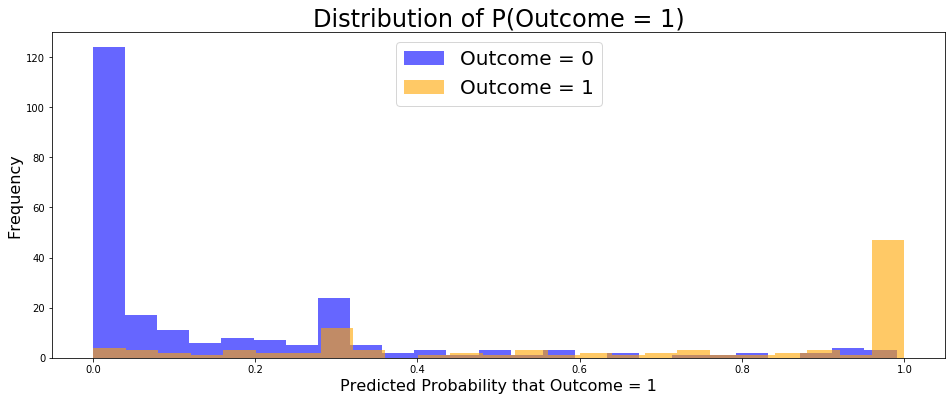

In [173]:
# Create figure.
plt.figure(figsize = (16,6))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['target_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['target_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=24)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=16)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

#### Receiver Operating Characteristic

In [174]:
pred_proba_Xtrain = [i[1] for i in mnb_cvec_gs.predict_proba(X_train)]
pred_df_Xtrain = pd.DataFrame({'target_values': y_train,'pred_probs':pred_proba_Xtrain})
roc_auc_score(y_train, pred_proba_Xtrain)

0.9093384475866154

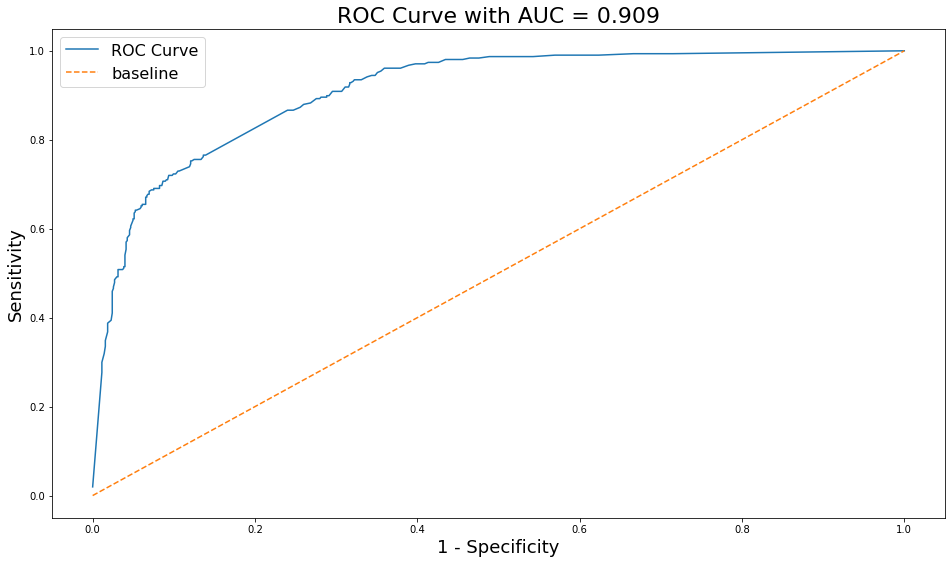

In [175]:
# Create figure.
plt.figure(figsize = (16,9))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df_Xtrain['target_values'], pred_df_Xtrain['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

The **Receiver Operating Characteristic** curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.

The more area under this blue curve is, the better separated our distributions are. We use the area under the ROC curve (abbreviated ROC AUC or AUC ROC) to quantify the gap between our distributions.

<hr>

<h3 style="color: blue">TFIDF Vectorization and Multinomial Naive Bayes Model</h3>

In [176]:
mnb_tvec_pipeline = Pipeline([
    ("tvec", TfidfVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("mnb", MultinomialNB())
    ])

In [177]:
mnb_tvec_parameters = {
    'tvec__max_features': [50, 100, 200],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3],
    'tvec__ngram_range':[(1,1),(1,2)] 
}

#### Fitting using GridSearchCV

In [178]:
mnb_tvec_gs = GridSearchCV(mnb_tvec_pipeline, param_grid=mnb_tvec_parameters, cv= 10, n_jobs = -2, verbose=1)
mnb_tvec_gs.fit(X_train, y_train)
print(f"Best score: {mnb_tvec_gs.best_score_}")

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed:   50.3s finished


Best score: 0.9049990293146962


In [179]:
print(f"Best parameters: {mnb_tvec_gs.best_params_}")

Best parameters: {'tvec__max_df': 0.2, 'tvec__max_features': 200, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2)}


In [180]:
print(f"TVEC Train accuracy: {mnb_tvec_gs.score(X_train, y_train)}")

TVEC Train accuracy: 0.9198813056379822


In [181]:
print(f"TVEC Test accuracy: {mnb_tvec_gs.score(X_test, y_test)}")

TVEC Test accuracy: 0.8905325443786982


#### Predictions and Confusion Matrix

In [182]:
# Generate the Prediction
preds_tvec_mnb = mnb_tvec_gs.predict(X_test)

In [183]:
confusion_matrix(y_test, preds_tvec_mnb)

array([[229,   6],
       [ 31,  72]])

In [184]:
tn_tvec_mnb, fp_tvec_mnb, fn_tvec_mnb, tp_tvec_mnb = confusion_matrix(y_test, preds_tvec_mnb).ravel()

In [191]:
# Function to show all the result in table
def tvec_mnb_model (columns_list):
    for i in columns_list:
        model_results = {}
        model_results['model'] = "TFIDF + MultinomialNB"
        model_results['precision']= tp_tvec_mnb/(tp_tvec_mnb+fp_tvec_mnb)
        model_results['baseline']= 0.69
        model_results['Train Accuracy'] = mnb_tvec_gs.score(X_train, y_train)
        model_results['Test Accuracy'] = mnb_tvec_gs.score(X_test, y_test)
        model_results['confusion matrix']={"TP": tp_tvec_mnb,"FP":fp_tvec_mnb, "TN": tn_tvec_mnb, "FN": fn_tvec_mnb}
        model_results['specificity']= tn_tvec_mnb/(tn_tvec_mnb+fp_tvec_mnb)
        model_results['sensitivity']= tp_tvec_mnb/(tp_tvec_mnb+fn_tvec_mnb)
        model_results['f1-score']= 2 * (((tp_tvec_mnb/(tp_tvec_mnb+fp_tvec_mnb)) 
                                        * (tp_tvec_mnb/(tp_tvec_mnb+fn_tvec_mnb))) / ((tp_tvec_mnb/(tp_tvec_mnb+fp_tvec_mnb)) 
                                        + (tp_tvec_mnb/(tp_tvec_mnb+fn_tvec_mnb))))
        model_results['ROC score']= 0.9779066108972461
        model_results
        df_list.append(model_results) 
    return (pd.DataFrame(df_list)).round(2)


In [192]:
columns_list = ['selftext']
df_list=[]
tvec_mnb_model(columns_list)

,model,precision,baseline,Train Accuracy,Test Accuracy,confusion matrix,specificity,sensitivity,f1-score,ROC score
0,TFIDF + MultinomialNB,0.92,0.69,0.92,0.89,"{'TP': 72, 'FP': 6, 'TN': 229, 'FN': 31}",0.97,0.7,0.8,0.98


In [187]:
pred_proba_tvec_mns = [i[1] for i in mnb_tvec_gs.predict_proba(X_test)]
pred_df_tvec_mns = pd.DataFrame({'target_values': y_test,'pred_probs':pred_proba_tvec_mns})

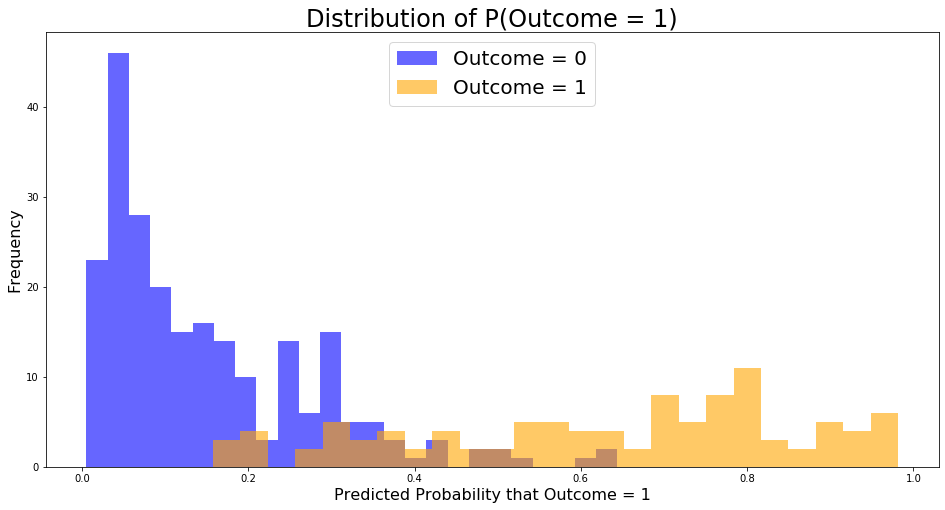

In [188]:
# Create figure.
plt.figure(figsize = (16,8))

# Create two histograms of observations.
plt.hist(pred_df_tvec_mns[pred_df_tvec_mns['target_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df_tvec_mns[pred_df_tvec_mns['target_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=24)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=16)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

#### Receiver Operating Characteristic

In [189]:
pred_proba_tvec_mnb_Xtrain = [i[1] for i in mnb_tvec_gs.predict_proba(X_train)]
pred_df_tvec_mnb_Xtrain = pd.DataFrame({'target_values': y_train,'pred_probs':pred_proba_tvec_mnb_Xtrain})
roc_auc_score(y_train, pred_proba_tvec_mnb_Xtrain)

0.9779066108972461

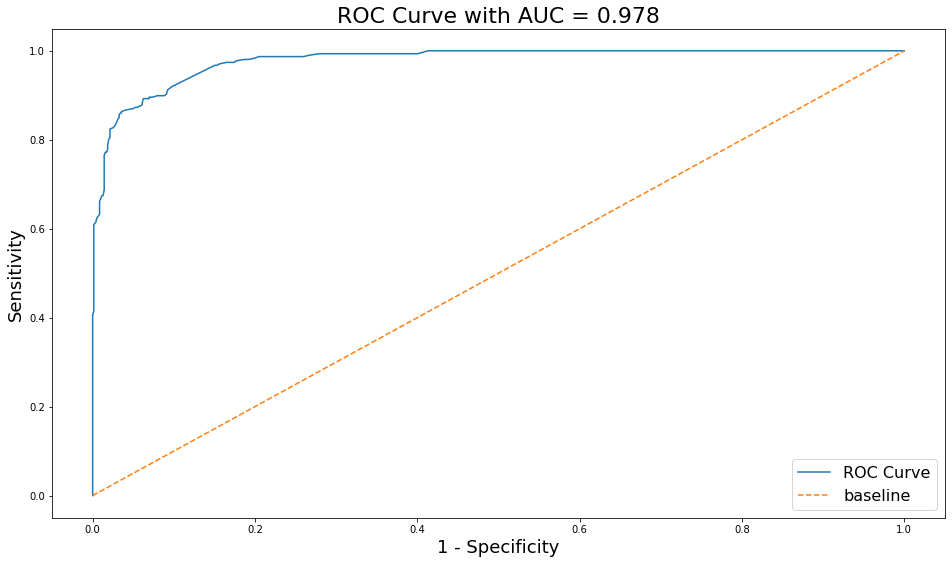

In [190]:
# Create figure.
plt.figure(figsize = (16,9))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_tvec_mnb_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_tvec_mnb_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df_tvec_mnb_Xtrain['target_values'], pred_df_tvec_mnb_Xtrain['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

<hr>

<h3 style="color: blue"> Counter Vectorization and Logistic Regression Model</h3>

In [212]:
lr_cvec_pipeline = Pipeline([
    ("cvec", CountVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("lr", LogisticRegression(solver='liblinear'))
    ])

In [213]:
lr_cvec_parameters = {
    'cvec__max_features': [20, 30, 50],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range':[(1,1),(1,2)],
    'lr__penalty':['l1','l2']
}

In [214]:
lr_cvec_rs = GridSearchCV(lr_cvec_pipeline, param_grid=lr_cvec_parameters, cv= 10, n_jobs = -2, verbose=1)
lr_cvec_rs.fit(X_train, y_train)

print(f"Best score: {lr_cvec_rs.best_score_}")

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 720 out of 720 | elapsed:  1.9min finished


Best score: 0.848650747427684


In [215]:
print(f"Best parameters: {lr_cvec_rs.best_params_}")

Best parameters: {'cvec__max_df': 0.2, 'cvec__max_features': 50, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'lr__penalty': 'l1'}


In [216]:
print(f"CVEC Train accuracy: {lr_cvec_rs.score(X_train, y_train)}")

CVEC Train accuracy: 0.8753709198813057


In [217]:
print(f"CVEC Test accuracy: {lr_cvec_rs.score(X_test, y_test)}")

CVEC Test accuracy: 0.8431952662721893


#### Predictions and Confusion Matrix

In [218]:
# Generate the Prediction
preds_cvec_lr = lr_cvec_rs.predict(X_test)

In [219]:
confusion_matrix(y_test, preds_cvec_lr)

array([[222,  13],
       [ 40,  63]])

In [220]:
tn_cvec_lr, fp_cvec_lr, fn_cvec_lr, tp_cvec_lr = confusion_matrix(y_test, preds_cvec_lr).ravel()

In [229]:
# Function to show all the result in table
def cvec_lr_model (columns_list):
    for i in columns_list:
        model_results = {}
        model_results['model'] = "CVEC + LogReg"
        model_results['precision']= tp_cvec_lr/(tp_cvec_lr+fp_cvec_lr)
        model_results['baseline']= 0.69
        model_results['Train Accuracy'] = lr_cvec_rs.score(X_train, y_train)
        model_results['Test Accuracy'] = lr_cvec_rs.score(X_test, y_test)
        model_results['confusion matrix']={"TP": tp_cvec_lr,"FP":fp_cvec_lr, "TN": tn_cvec_lr, "FN": fn_cvec_lr}
        model_results['specificity']= tn_cvec_lr/(tn_cvec_lr+fp_cvec_lr)
        model_results['sensitivity']= tp_cvec_lr/(tp_cvec_lr+fn_cvec_lr)
        model_results['f1-score']= 2 * (((tp_cvec_lr/(tp_cvec_lr+fp_cvec_lr)) 
                                        * (tp_cvec_lr/(tp_cvec_lr+fn_cvec_lr))) / ((tp_cvec_lr/(tp_cvec_lr+fp_cvec_lr)) 
                                        + (tp_cvec_lr/(tp_cvec_lr+fn_cvec_lr))))
        model_results['ROC score']= 0.9294630959431448
        model_results
        df_list.append(model_results) 
    return (pd.DataFrame(df_list)).round(2)


In [230]:
columns_list = ['selftext']
df_list=[]
cvec_lr_model(columns_list)

,model,precision,baseline,Train Accuracy,Test Accuracy,confusion matrix,specificity,sensitivity,f1-score,ROC score
0,CVEC + LogReg,0.83,0.69,0.88,0.84,"{'TP': 63, 'FP': 13, 'TN': 222, 'FN': 40}",0.94,0.61,0.7,0.93


In [223]:
pred_proba_cvec_lr = [i[1] for i in lr_cvec_rs.predict_proba(X_test)]
pred_df_cvec_lr = pd.DataFrame({'target_values': y_test,'pred_probs':pred_proba_cvec_lr})

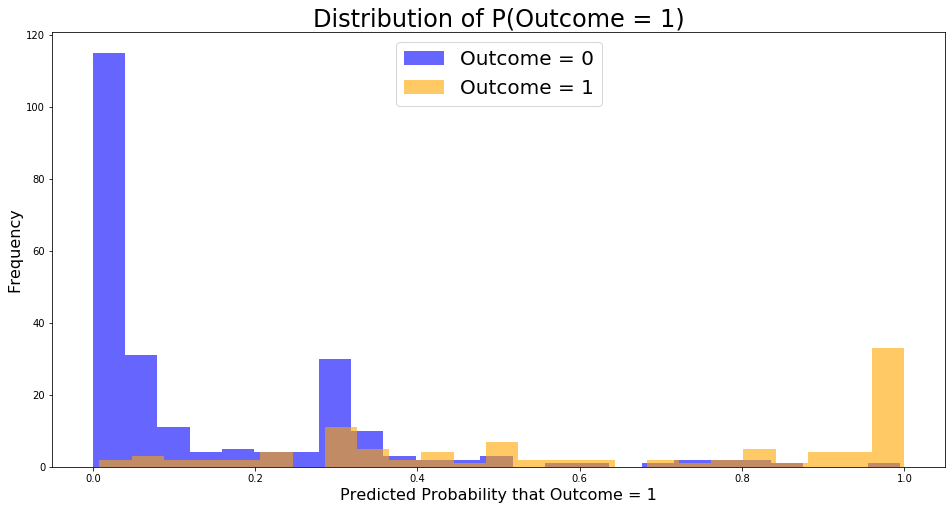

In [224]:
# Create figure.
plt.figure(figsize = (16,8))

# Create two histograms of observations.
plt.hist(pred_df_cvec_lr[pred_df_cvec_lr['target_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df_cvec_lr[pred_df_cvec_lr['target_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=24)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=16)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

#### Receiver Operating Characteristic

In [227]:
pred_proba_cvec_lr_Xtrain = [i[1] for i in lr_cvec_rs.predict_proba(X_train)]
pred_df_cvec_lr_Xtrain = pd.DataFrame({'target_values': y_train,'pred_probs':pred_proba_cvec_lr_Xtrain})
roc_auc_score(y_train, pred_proba_cvec_lr_Xtrain)

0.9294630959431448

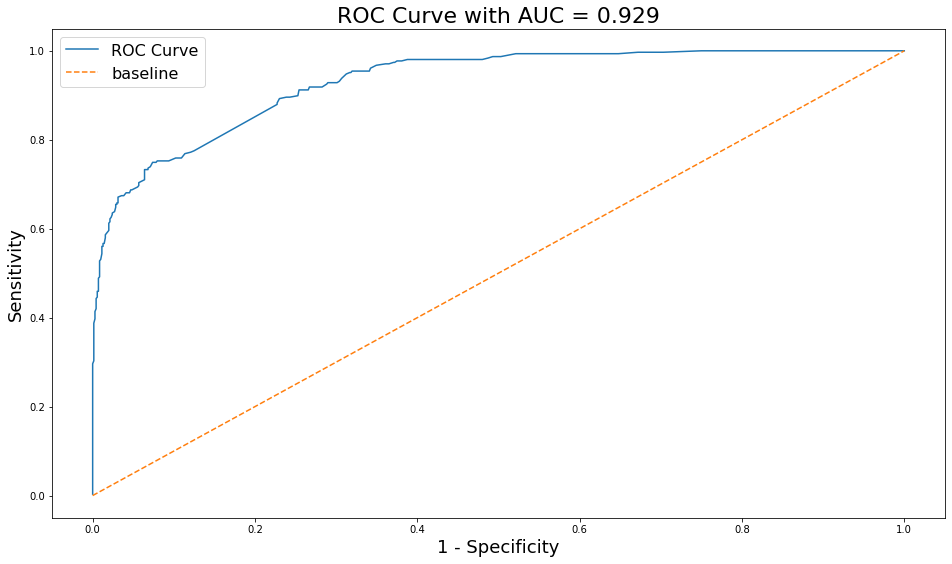

In [228]:
# Create figure.
plt.figure(figsize = (16,9))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_cvec_lr_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_cvec_lr_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df_cvec_lr_Xtrain['target_values'], pred_df_cvec_lr_Xtrain['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

<hr>

<h3 style="color: blue">TFIDF Vectorization and Logistic Regression Model</h3>

In [121]:
lr_tvec_pipeline = Pipeline([
    ("tvec", TfidfVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("lr", LogisticRegression())
    ])

In [231]:
lr_tvec_parameters = {
    'tvec__max_features': [250, 500],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .3],
    'tvec__ngram_range':[(1,1),(1,2)],
    'lr__penalty':['l1','l2'],
    }

#### Fitting using RandomizedSearchCV

In [232]:
lr_tvec_rs = RandomizedSearchCV(lr_tvec_pipeline, param_distributions=lr_tvec_parameters, cv= 10, verbose=1)
lr_tvec_rs.fit(X_train, y_train)
print(f"Best score: {lr_tvec_rs.best_score_}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.7s finished


Best score: 0.9139196272568434


In [233]:
print(f"Best parameters: {lr_tvec_rs.best_params_}")

Best parameters: {'tvec__ngram_range': (1, 2), 'tvec__min_df': 2, 'tvec__max_features': 250, 'tvec__max_df': 0.3, 'lr__penalty': 'l2'}


In [234]:
print(f"TVEC Train accuracy: {lr_tvec_rs.score(X_train, y_train)}")

TVEC Train accuracy: 0.9416419386745796


In [235]:
print(f"TVEC Test accuracy: {lr_tvec_rs.score(X_test, y_test)}")

TVEC Test accuracy: 0.8964497041420119


#### Predictions and Confusion Matrix

In [236]:
# Generate the Prediction
preds_tvec_lr = lr_tvec_rs.predict(X_test)

In [237]:
confusion_matrix(y_test, preds_tvec_lr)

array([[229,   6],
       [ 29,  74]])

In [238]:
tn_tvec_lr, fp_tvec_lr, fn_tvec_lr, tp_tvec_lr = confusion_matrix(y_test, preds_tvec_lr).ravel()

In [254]:
# Function to show all the result in table
def tvec_lr_model (columns_list):
    for i in columns_list:
        model_results = {}
        model_results['model'] = "TFIDF + LogReg"
        model_results['precision']= tp_tvec_lr/(tp_tvec_lr+fp_tvec_lr)
        model_results['baseline']= 0.69
        model_results['Train Accuracy'] = lr_tvec_rs.score(X_train, y_train)
        model_results['Test Accuracy'] = lr_tvec_rs.score(X_test, y_test)
        model_results['confusion matrix']={"TP": tp_tvec_lr,"FP":fp_tvec_lr, "TN": tn_tvec_lr, "FN": fn_tvec_lr}
        model_results['specificity']= tn_tvec_lr/(tn_tvec_lr+fp_tvec_lr)
        model_results['sensitivity']= tp_tvec_lr/(tp_tvec_lr+fn_tvec_lr)
        model_results['f1-score']= 2 * (((tp_tvec_lr/(tp_tvec_lr+fp_tvec_lr)) 
                                        * (tp_tvec_lr/(tp_tvec_lr+fn_tvec_lr))) / ((tp_tvec_lr/(tp_tvec_lr+fp_tvec_lr)) 
                                        + (tp_tvec_lr/(tp_tvec_lr+fn_tvec_lr))))
        model_results['ROC score']= 0.9843773134438851
        model_results
        df_list.append(model_results) 
    return (pd.DataFrame(df_list)).round(2)


In [255]:
columns_list = ['selftext']
df_list=[]
tvec_lr_model(columns_list)

,model,precision,baseline,Train Accuracy,Test Accuracy,confusion matrix,specificity,sensitivity,f1-score,ROC score
0,TFIDF + LogReg,0.92,0.69,0.94,0.9,"{'TP': 74, 'FP': 6, 'TN': 229, 'FN': 29}",0.97,0.72,0.81,0.98


In [250]:
pred_proba_tvec_lr = [i[1] for i in lr_tvec_rs.predict_proba(X_test)]
pred_df_tvec_lr = pd.DataFrame({'target_values': y_test,'pred_probs':pred_proba_tvec_lr})

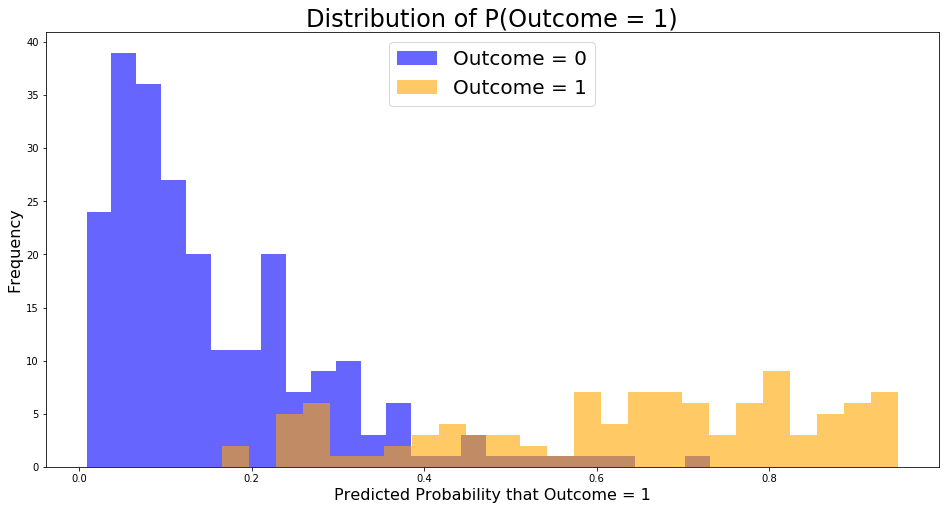

In [251]:
# Create figure.
plt.figure(figsize = (16,8))

# Create two histograms of observations.
plt.hist(pred_df_tvec_lr[pred_df_tvec_lr['target_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df_tvec_lr[pred_df_tvec_lr['target_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=24)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=16)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

#### Receiver Operating Characteristic

In [252]:
pred_proba_tvec_lr_Xtrain = [i[1] for i in lr_tvec_rs.predict_proba(X_train)]
pred_df_tvec_lr_Xtrain = pd.DataFrame({'target_values': y_train,'pred_probs':pred_proba_tvec_lr_Xtrain})
roc_auc_score(y_train, pred_proba_tvec_lr_Xtrain)

0.9843773134438851

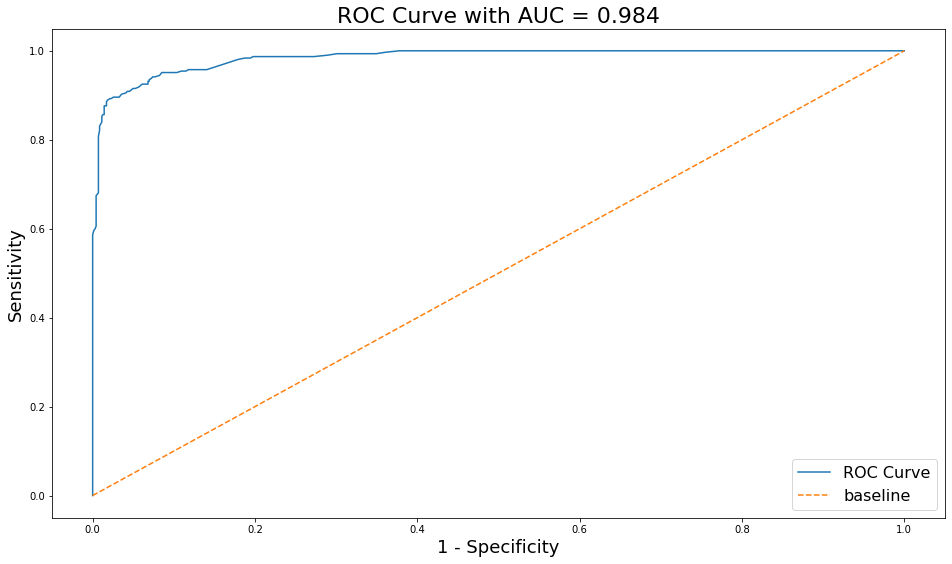

In [253]:
# Create figure.
plt.figure(figsize = (16,9))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df_tvec_lr_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df_tvec_lr_Xtrain, 'target_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df_tvec_lr_Xtrain['target_values'], pred_df_tvec_lr_Xtrain['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);